Proyecto final


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Dec  8 21:53:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
%%capture
!pip install wandb --upgrade

In [ ]:
import wandb
from wandb.keras import WandbCallback
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
 #Importar modulos

import os
import keras
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
#%matplotlib inline

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Embedding, LSTM
from keras import regularizers, layers, preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, hamming_loss, matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

In [ ]:
!git clone https://github.com/RichardUABC/ResistData.git


fatal: destination path 'ResistData' already exists and is not an empty directory.


In [ ]:
#cargar data set
DataRaw = np.load('/content/ResistData/dataset.npy', allow_pickle=True)
print(type(DataRaw))
print(DataRaw.ndim)
DataRaw

<class 'numpy.ndarray'>
0


array({'resistant': array([False, False, False, ...,  True,  True, False]), 'genes': array(['ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACCCGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       ...,
       'ATGCACTACCGTATGATTCACTGGATGATGGAAACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTAC

In [ ]:


# Tranformar como diccionario
Datadict = DataRaw[()]
print(Datadict)

# Transformar dataframe
DataDf = pd.DataFrame.from_dict(Datadict)
print(DataDf.shape)
DataDf

{'resistant': array([False, False, False, ...,  True,  True, False]), 'genes': array(['ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACCCGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       ...,
       'ATGCACTACCGTATGATTCACTGGATGATGGAAACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA',
       'ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTC

,resistant,genes
0,False,ATGCACTACCGTATGATCCCCCTTCACTGGATGATGGAAATTGACT...
1,False,ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATG...
2,False,ATGCACTACCGTATGATTCACTGGATCGTGATGGAAATTGACTGCA...
3,False,ATGCACTACCGTATGATTCACTGGGTGATGGAAATTGACTGCAATG...
4,False,ATGCACGACCGTATCATTCACTGGATGATGGAAATTGACTGCAATG...
...,...,...
99995,False,ATGCACTACCGTATGATTCACTGGATGATGGAAACTCTCTTTGACT...
99996,False,ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTGCAATG...
99997,True,ATGCACTACCGTATGATTCACTGGATGATGGAAACTGCAATGGCTG...
99998,True,ATGCACTACCGTATGATTCACTGGATGATGGAAATTGACTTGCAAT...


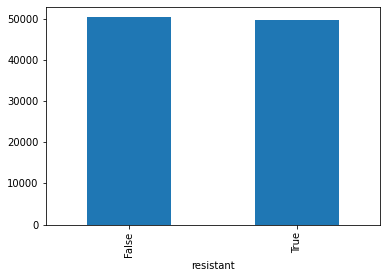

Found 4 unique tokens.
word_index {'a': 1, 't': 2, 'c': 3, 'g': 4}
(100000, 160)
(100000,)


In [ ]:



# promedio  / Max / Min ancho de columna

DataDf.fillna('').astype(str).apply(lambda x:x.str.len()).max()

# observar si los datos estan balanceados

DataDf.groupby('resistant').size().plot.bar()
plt.show()


# Tokenize caracteres a numeros enteros

Datatok = DataDf.copy()
maxlen = 160 # Limita el numero de caracteres 

max_words = 4 # Numero de caracteres del diccionario que considera ATGC
max_features = max_words

tokenizer = Tokenizer(num_words=max_words, char_level=True)
tokenizer.fit_on_texts(list(Datatok['genes']))
sequences = tokenizer.texts_to_sequences(list(Datatok['genes']))
word_index = tokenizer.word_index
Xpad = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post', value=0)

print('Found %s unique tokens.' % len(word_index))
print('word_index', word_index)

# Separa las etiquetas

labels = np.asarray(Datatok['resistant'])
print(Xpad.shape)
print(labels.shape)




In [ ]:
# Revisa una muestra

rowNum = 70
print(Datatok['genes'][rowNum])
print(sequences[rowNum])
print(Xpad[rowNum])
print(labels[rowNum])

ATGCACTACCGTATGATTCTTCTTACTGGATGATGGAAATTGACTGCAATGGCTGCGCTAATAATACTTTGTCTCGTCGTTGGAATTACGACTTCTGGCACAAACACGTTGAACAGGTTAAATGCTACCGTCACAATATTCGTGACCAGACTTGA
[1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 3, 1, 1, 2, 3, 2, 3, 3, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 1, 3, 1, 3, 2, 2, 3, 2, 3, 1, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 3, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 3, 2, 1, 3, 3, 1, 1, 3, 2, 2, 1]
[1 2 3 1 3 2 1 3 3 2 1 2 1 2 2 3 2 2 3 2 2 1 3 2 1 2 1 2 1 1 1 2 2 1 3 2 3
 1 1 2 3 2 3 3 2 1 1 2 1 1 2 1 3 2 2 2 2 3 2 3 2 3 2 2 1 1 2 2 1 3 1 3 2 2
 3 2 3 1 3 1 1 1 3 1 3 2 2 1 1 3 1 2 2 1 1 1 2 3 2 1 3 3 2 3 1 3 1 1 2 1 2
 2 3 2 1 3 3 1 1 3 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
True


In [ ]:
# Crea datos de entrenamiento y prueba

training_samples = int(Xpad.shape[0] * 0.9)


indices = np.arange(Xpad.shape[0])
np.random.shuffle(indices) 
Xpad = Xpad[indices]
labels = labels[indices]

x_train = Xpad[:training_samples]
y_train = labels[:training_samples]
x_test = Xpad[training_samples: ]
y_test = labels[training_samples: ]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (90000, 160)
y_train (90000,)
x_test (10000, 160)
y_test (10000,)


In [ ]:
# Modelo ... 128 CNN ventana 27 & Bidirectional GRU accuracy = 

model_CNN = Sequential()
model_CNN.add(Embedding(4, 1, input_length=maxlen))
model_CNN.add(layers.Conv1D(128, 27, activation='relu'))
model_CNN.add(layers.MaxPooling1D(9))
model_CNN.add(layers.Dropout(0.5))
model_CNN.add(layers.Conv1D(128, 9, activation='relu'))
model_CNN.add(layers.Dropout(0.5))
model_CNN.add(layers.Bidirectional(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2)))
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 1)            4         
                                                                 
 conv1d (Conv1D)             (None, 134, 128)          3584      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 128)            147584    
                                                                 
 dropout_1 (Dropout)         (None, 6, 128)            0         
                                                        

In [ ]:
# Initialize wandb with your project name
run = wandb.init(project='Proyecto_IDD',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.001,
                     "epochs": 10,
                     "batch_size": 32,
                     "loss_function": "binary_crossentropy"                    
                 })
config = wandb.config  # We'll use this to configure our experiment

# Initialize model like you usually do.
tf.keras.backend.clear_session()
#model = model()
model_CNN.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 1)            4         
                                                                 
 conv1d (Conv1D)             (None, 134, 128)          3584      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 128)            147584    
                                                                 
 dropout_1 (Dropout)         (None, 6, 128)            0         
                                                        

In [ ]:
logging_callback = WandbCallback(log_evaluation=True)

In [ ]:

# Entrenar el modelo 

history_CNN = model_CNN.fit(x_train, y_train, batch_size=32, epochs = 10,callbacks=[logging_callback])



wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/10
2813/2813 [==============================] - 127s 41ms/step - loss: 0.5774 - acc: 0.6516
Epoch 2/10
2813/2813 [==============================] - 114s 40ms/step - loss: 0.4944 - acc: 0.7194
Epoch 3/10
2813/2813 [==============================] - 115s 41ms/step - loss: 0.4464 - acc: 0.7527
Epoch 4/10
2813/2813 [==============================] - 113s 40ms/step - loss: 0.4193 - acc: 0.7676
Epoch 5/10
2813/2813 [==============================] - 113s 40ms/step - loss: 0.4083 - acc: 0.7714
Epoch 6/10
2813/2813 [==============================] - 114s 40ms/step - loss: 0.4000 - acc: 0.7758
Epoch 7/10
2813/2813 [==============================] - 114s 40ms/step - loss: 0.3951 - acc: 0.7780
Epoch 8/10
2813/2813 [==============================] - 113s 40ms/step - loss: 0.3900 - acc: 0.7820
Epoch 9/10
2813/2813 [==============================] - 113s 40ms/step - loss: 0.3861 - acc: 0.7827
Epoch 10/10
2813/2813 [==============================] - 114s 41ms/step - loss: 0.3833 - acc: 0.7852

In [ ]:
# Prediccion final 

final_predictions_CNN = model_CNN.predict(x_test)
print(final_predictions_CNN)

# Modifica las prediciones a  0 y 1
# Cutoff point = 0.5

Preds_CNN = final_predictions_CNN.copy()
print(len(Preds_CNN))

Preds_CNN[ np.where( Preds_CNN >= 0.5 ) ] = 1
Preds_CNN[ np.where( Preds_CNN < 0.5 ) ] = 0
print(Preds_CNN)

[[0.9998522 ]
 [0.36710277]
 [0.00787355]
 ...
 [0.01712963]
 [0.35146847]
 [0.6507306 ]]
10000
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [ ]:
#MEtricas
print("Accuracy:", accuracy_score(y_test,Preds_CNN))
print("F1 Score:", f1_score(y_test,Preds_CNN))
print("Precicion:", precision_score(y_test,Preds_CNN))
print("Recall:", recall_score(y_test,Preds_CNN))
print("Hamming Loss:", hamming_loss(y_test,Preds_CNN))
print("Cohen Kappa:", cohen_kappa_score(y_test,Preds_CNN))
print("Matthews Coeficient:", matthews_corrcoef(y_test,Preds_CNN))

Accuracy: 0.7951
F1 Score: 0.7701626472237803
Precicion: 0.8919199792153806
Recall: 0.6776549545992894
Hamming Loss: 0.2049
Cohen Kappa: 0.5914414623149513
Matthews Coeficient: 0.6096638648974368


TN:  4518
FP:  416
FN:  1633
TP:  3433
0.6776549545992894 0.8919199792153806


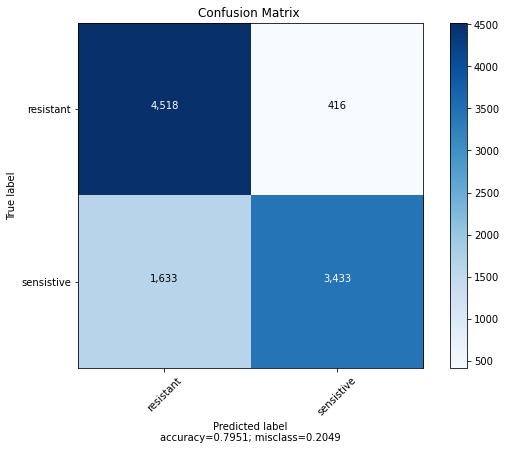

In [ ]:

# Matriz de confusión 

conf_mx = confusion_matrix(y_test, Preds_CNN)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

# funcion para graficar 

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['resistant', 'sensistive'],
                      title        = "Confusion Matrix ")

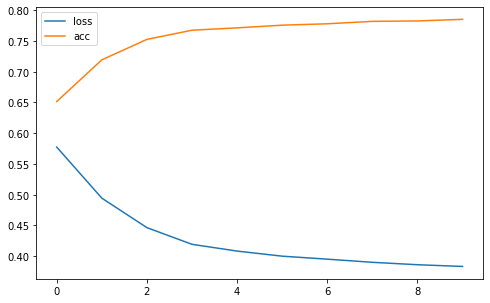

In [ ]:
pd.DataFrame(history_CNN.history).plot(figsize=(8, 5))


In [ ]:

# Entrenar el modelo 

history_val = model_CNN.fit(x_train, y_train, batch_size=32, epochs = 10,callbacks=[logging_callback],validation_split=0.1)


wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/10
2532/2532 [==============================] - 106s 42ms/step - loss: 0.3821 - acc: 0.7850 - val_loss: 0.3578 - val_acc: 0.8040
Epoch 2/10
2532/2532 [==============================] - 105s 41ms/step - loss: 0.3799 - acc: 0.7871 - val_loss: 0.3637 - val_acc: 0.7992
Epoch 3/10
2532/2532 [==============================] - 100s 40ms/step - loss: 0.3788 - acc: 0.7861 - val_loss: 0.3646 - val_acc: 0.7968
Epoch 4/10
2532/2532 [==============================] - 100s 40ms/step - loss: 0.3767 - acc: 0.7874 - val_loss: 0.3645 - val_acc: 0.7981
Epoch 5/10
2532/2532 [==============================] - 104s 41ms/step - loss: 0.3765 - acc: 0.7865 - val_loss: 0.3672 - val_acc: 0.7946
Epoch 6/10
2532/2532 [==============================] - 104s 41ms/step - loss: 0.3731 - acc: 0.7898 - val_loss: 0.3540 - val_acc: 0.8039
Epoch 7/10
2532/2532 [==============================] - 103s 41ms/step - loss: 0.3741 - acc: 0.7891 - val_loss: 0.3578 - val_acc: 0.8046
Epoch 8/10
2532/2532 [===================

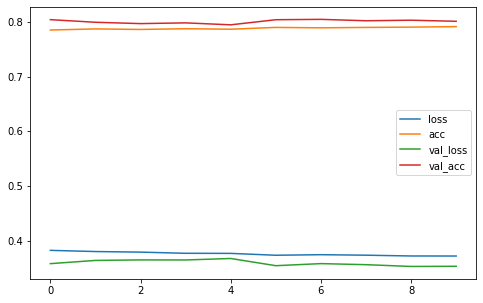

In [ ]:
pd.DataFrame(history_val.history).plot(figsize=(8, 5))


In [ ]:
# Prediccion final 

final_predictions = model_CNN.predict(x_test)
print(final_predictions)

# Modifica las prediciones a  0 y 1
# Cutoff point = 0.5

Preds_CNN_VAL = final_predictions.copy()
print(len(Preds_CNN_VAL))

Preds_CNN_VAL[ np.where( Preds_CNN_VAL >= 0.5 ) ] = 1
Preds_CNN_VAL[ np.where( Preds_CNN_VAL < 0.5 ) ] = 0
print(Preds_CNN_VAL)

[[9.9941695e-01]
 [3.2331431e-01]
 [2.3349461e-03]
 ...
 [5.1977928e-04]
 [2.7276197e-01]
 [6.5869111e-01]]
10000
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [ ]:
#Metricas
print("Accuracy:", accuracy_score(y_test,Preds_CNN_VAL))
print("F1 Score:", f1_score(y_test,Preds_CNN_VAL))
print("Precicion:", precision_score(y_test,Preds_CNN_VAL))
print("Recall:", recall_score(y_test,Preds_CNN_VAL))
print("Hamming Loss:", hamming_loss(y_test,Preds_CNN_VAL))
print("Cohen Kappa:", cohen_kappa_score(y_test,Preds_CNN_VAL))
print("Matthews Coeficient:", matthews_corrcoef(y_test,Preds_CNN_VAL))

Accuracy: 0.8049
F1 Score: 0.7955569527402285
Precicion: 0.8478892115255752
Recall: 0.7493091196210028
Hamming Loss: 0.1951
Cohen Kappa: 0.6103380140971757
Matthews Coeficient: 0.6146054687914942


TN:  4253
FP:  681
FN:  1270
TP:  3796
0.7493091196210028 0.8478892115255752


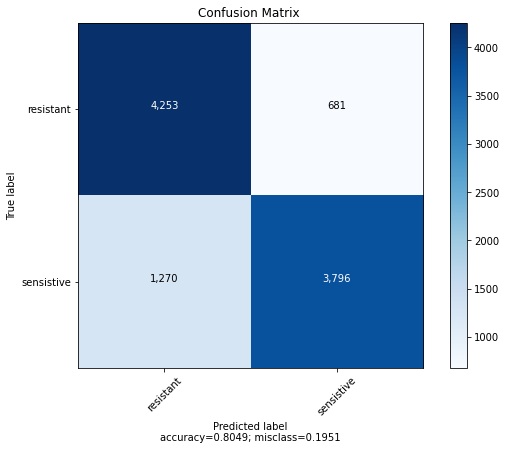

In [ ]:

# Matriz de confusión 

conf_mx = confusion_matrix(y_test, Preds_CNN_VAL)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

# funcion para graficar 

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['resistant', 'sensistive'],
                      title        = "Confusion Matrix ")

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(4, 1, input_length=maxlen))
model_LSTM.add(layers.Conv1D(128, 27, activation='relu'))
model_LSTM.add(layers.MaxPooling1D(9))
model_LSTM.add(layers.Dropout(0.5))
model_LSTM.add(layers.Conv1D(128, 9, activation='relu'))
model_LSTM.add(layers.Dropout(0.5))
model_LSTM.add(layers.Bidirectional(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 1)            4         
                                                                 
 conv1d (Conv1D)             (None, 134, 128)          3584      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 128)            147584    
                                                                 
 dropout_1 (Dropout)         (None, 6, 128)            0         
                                                        

In [ ]:

# Entrenar el modelo 

history_LSTM = model_LSTM.fit(x_train, y_train, batch_size=32, epochs = 10,callbacks=[logging_callback],validation_split=0.1)


wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/10
2532/2532 [==============================] - 123s 47ms/step - loss: 0.6003 - acc: 0.6460 - val_loss: 0.5091 - val_acc: 0.7191
Epoch 2/10
2532/2532 [==============================] - 118s 47ms/step - loss: 0.5129 - acc: 0.7034 - val_loss: 0.4631 - val_acc: 0.7748
Epoch 3/10
2532/2532 [==============================] - 116s 46ms/step - loss: 0.4736 - acc: 0.7345 - val_loss: 0.4219 - val_acc: 0.7844
Epoch 4/10
2532/2532 [==============================] - 117s 46ms/step - loss: 0.4387 - acc: 0.7563 - val_loss: 0.4046 - val_acc: 0.7810
Epoch 5/10
2532/2532 [==============================] - 116s 46ms/step - loss: 0.4216 - acc: 0.7666 - val_loss: 0.3885 - val_acc: 0.7876
Epoch 6/10
2532/2532 [==============================] - 116s 46ms/step - loss: 0.4078 - acc: 0.7735 - val_loss: 0.3762 - val_acc: 0.7987
Epoch 7/10
2532/2532 [==============================] - 116s 46ms/step - loss: 0.4024 - acc: 0.7754 - val_loss: 0.3733 - val_acc: 0.7957
Epoch 8/10
2532/2532 [===================

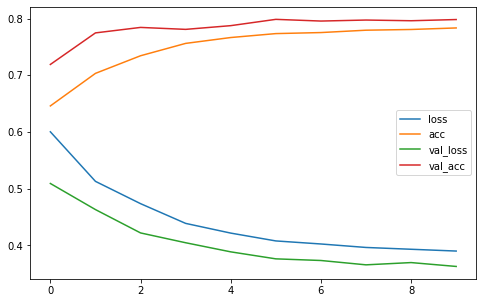

In [ ]:
pd.DataFrame(history_LSTM.history).plot(figsize=(8, 5))


In [ ]:
# Prediccion final 

final_predictions = model_LSTM.predict(x_test)
print(final_predictions)

# Modifica las prediciones a  0 y 1
# Cutoff point = 0.5

Preds_LSTM = final_predictions.copy()
print(len(Preds_LSTM))

Preds_LSTM[ np.where( Preds_LSTM >= 0.5 ) ] = 1
Preds_LSTM[ np.where( Preds_LSTM < 0.5 ) ] = 0
print(Preds_LSTM)

[[0.9982267 ]
 [0.2486218 ]
 [0.00291952]
 ...
 [0.13832064]
 [0.2737539 ]
 [0.7913941 ]]
10000
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [ ]:
#Metricas
print("Accuracy:", accuracy_score(y_test,Preds_LSTM))
print("F1 Score:", f1_score(y_test,Preds_LSTM))
print("Precicion:", precision_score(y_test,Preds_LSTM))
print("Recall:", recall_score(y_test,Preds_LSTM))
print("Hamming Loss:", hamming_loss(y_test,Preds_LSTM))
print("Cohen Kappa:", cohen_kappa_score(y_test,Preds_LSTM))
print("Matthews Coeficient:", matthews_corrcoef(y_test,Preds_LSTM))

Accuracy: 0.7982
F1 Score: 0.7844017094017094
Precicion: 0.8549138332557057
Recall: 0.7246348203711015
Hamming Loss: 0.2018
Cohen Kappa: 0.5971508463665083
Matthews Coeficient: 0.6043711068436486


In [ ]:
# Matriz de confusión 

conf_mx = confusion_matrix(y_test, Preds_LSTM)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)
#Sensibilidad = VP / (VP + FN)​
Especificidad = TN / (TN + FP).

print (recall, precision)

# funcion para graficar 

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['resistant', 'sensistive'],
                      title        = "Confusion Matrix ")

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report,hamming_loss,matthews_corrcoef,roc_curve

RF = RandomForestClassifier(max_depth=2, random_state=0)
history_RF = RF.fit(x_train, y_train)
y_predict = RF.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.63      0.60      0.61      5064
        True       0.61      0.65      0.63      4936

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



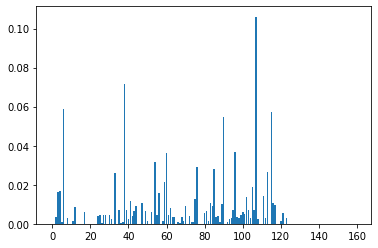

In [ ]:
#Para dibujar todos las variables con su importancia
from matplotlib import pyplot
pyplot.bar(range(len(history_RF.feature_importances_)), history_RF.feature_importances_)
pyplot.show()

In [ ]:
# Prediccion final 

final_predictions = RF.predict(x_test)
print(final_predictions)

# Modifica las prediciones a  0 y 1
# Cutoff point = 0.5

Preds_RF = final_predictions.copy()
print(len(Preds_RF))

Preds_RF[ np.where( Preds_RF >= 0.5 ) ] = 1
Preds_RF[ np.where( Preds_RF < 0.5 ) ] = 0
print(Preds_RF)

[ True False False ...  True  True  True]
10000
[ True False False ...  True  True  True]


In [ ]:
#Metricas
print("Accuracy:", accuracy_score(y_test,Preds_RF))
print("F1 Score:", f1_score(y_test,Preds_RF))
print("Precicion:", precision_score(y_test,Preds_RF))
print("Recall:", recall_score(y_test,Preds_RF))
print("Hamming Loss:", hamming_loss(y_test,Preds_RF))
print("Cohen Kappa:", cohen_kappa_score(y_test,Preds_RF))
print("Matthews Coeficient:", matthews_corrcoef(y_test,Preds_RF))

Accuracy: 0.6128
F1 Score: 0.625531914893617
Precicion: 0.6131968145620023
Recall: 0.6383734701934465
Hamming Loss: 0.3872
Cohen Kappa: 0.22503942451811942
Matthews Coeficient: 0.22523468247863912


TN:  2894
FP:  2040
FN:  1832
TP:  3234
0.6383734701934465 0.6131968145620023


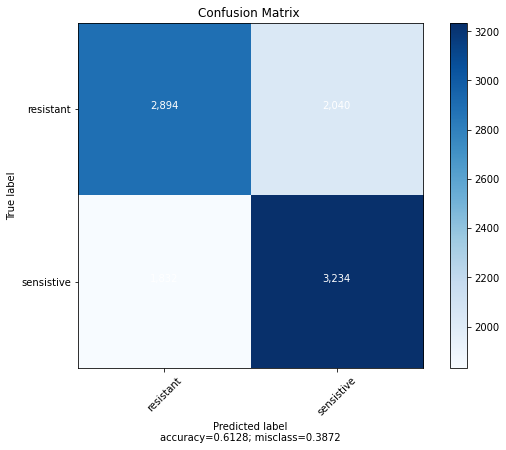

In [ ]:
# Matriz de confusión 

conf_mx = confusion_matrix(y_test, Preds_RF)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

# funcion para graficar 

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['resistant', 'sensistive'],
                      title        = "Confusion Matrix ")

In [ ]:
from sklearn import svm
from sklearn.svm import SVC


In [ ]:
SVM_model =SVC()
SVM_model.fit(x_train,y_train)
pred_SVM_model = SVM_model.predict(x_test)

In [ ]:
print(classification_report(y_test,pred_SVM_model))

              precision    recall  f1-score   support

       False       0.76      0.83      0.79      4934
        True       0.82      0.74      0.78      5066

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [ ]:
# Prediccion final 

final_predictions = SVM_model.predict(x_test)
print(final_predictions)

# Modifica las prediciones a  0 y 1
# Cutoff point = 0.5

pred_SVM = final_predictions.copy()
print(len(pred_SVM))

pred_SVM[ np.where( pred_SVM >= 0.5 ) ] = 1
pred_SVM[ np.where( pred_SVM < 0.5 ) ] = 0
print(pred_SVM)

[ True False False ... False False  True]
10000
[ True False False ... False False  True]


In [ ]:
#Metricas
print("Accuracy:", accuracy_score(y_test,pred_SVM))
print("F1 Score:", f1_score(y_test,pred_SVM))
print("Precicion:", precision_score(y_test,pred_SVM))
print("Recall:", recall_score(y_test,pred_SVM))
print("Hamming Loss:", hamming_loss(y_test,pred_SVM))
print("Cohen Kappa:", cohen_kappa_score(y_test,pred_SVM))
print("Matthews Coeficient:", matthews_corrcoef(y_test,pred_SVM))

Accuracy: 0.7855
F1 Score: 0.7779732946899907
Precicion: 0.8178454842219804
Recall: 0.7418081326490328
Hamming Loss: 0.2145
Cohen Kappa: 0.571458196895879
Matthews Coeficient: 0.5740051679400251


TN:  4097
FP:  837
FN:  1308
TP:  3758
0.7418081326490328 0.8178454842219804


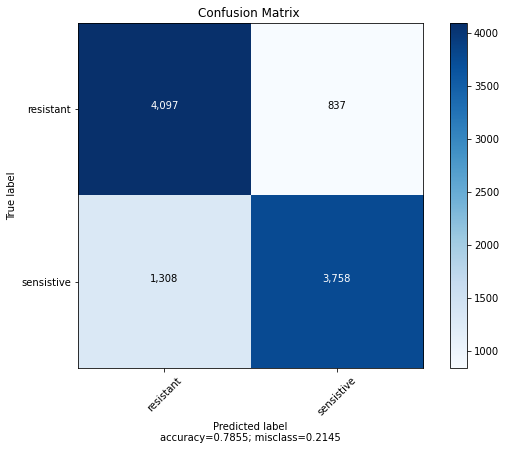

In [ ]:
# Matriz de confusión 

conf_mx = confusion_matrix(y_test, pred_SVM)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

# funcion para graficar 

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['resistant', 'sensistive'],
                      title        = "Confusion Matrix ")